In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

def showimage(img, fsize = (8,6)):
    plt.figure(figsize=fsize)
    plt.axis('off')
    plt.imshow(img)
    
def show_grayimages(imgs, titles, row, col, fsize=(8,6)):
    fig = plt.figure(figsize=fsize)
    for i in range(row*col):
        ax = fig.add_subplot(row, col, i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        ax.imshow(imgs[i], cmap='gray', vmin=0, vmax=255)

In [2]:
x = np.uint8([250])
y = np.uint8([50])
result_opencv = cv2.add(x, y)
print("cv2.add(x: {}, y: {} = {})".format(x, y, result_opencv))

cv2.add(x: [250], y: [50] = [[255]])


In [3]:
lenna_img = cv2.imread('D:/Data/DIP4E/lenna-RGB.tif')
lenna_img = cv2.cvtColor(lenna_img, cv2.COLOR_BGR2RGB)

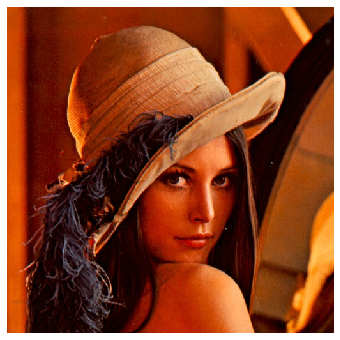

In [4]:
showimage(lenna_img)

### Edge Detection using Sobel Filter

In [5]:
lenna_gray = cv2.cvtColor(lenna_img, cv2.COLOR_RGB2GRAY)
gradient_x = cv2.Sobel(lenna_gray, cv2.CV_16S, 1, 0, 3)
gradient_y = cv2.Sobel(lenna_gray, cv2.CV_16S, 0, 1, 3)
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)
sobel_img = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

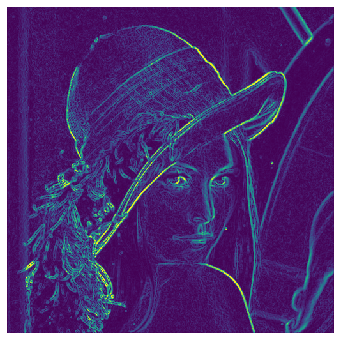

In [6]:
showimage(sobel_img)

### Image Spatial Filtering Using Kernel

#### Box Kernel

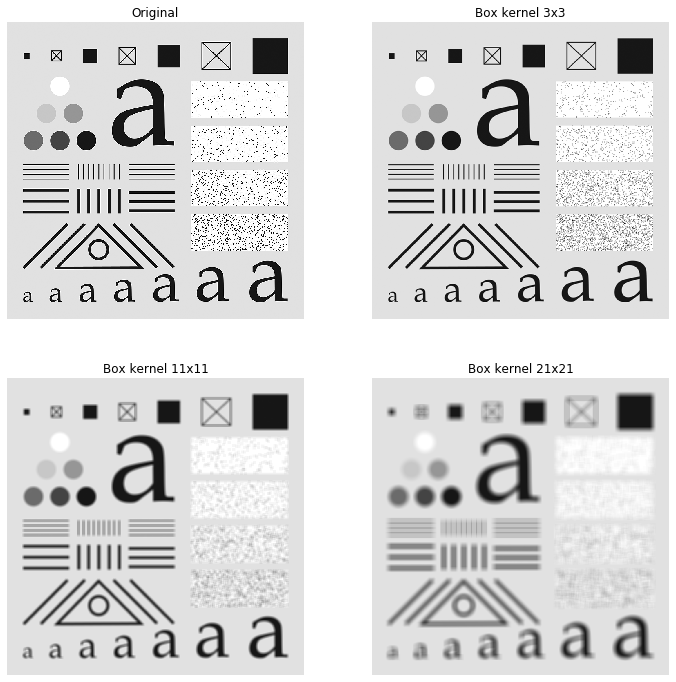

In [7]:
ptn_img = cv2.imread('D:/Data/DIP4E/testpattern1024.tif')
box33_kernel = np.ones((3,3), dtype=np.float32) / 9
box1111_kernel = np.ones((11, 11), dtype=np.float32) / 121
box2121_kernel = np.ones((21, 21), dtype=np.float32) / (21*21)
ptn_box33 = cv2.filter2D(ptn_img, -1, box33_kernel)
ptn_box1111 = cv2.filter2D(ptn_img, -1, box1111_kernel)
ptn_box2121 = cv2.filter2D(ptn_img, -1, box2121_kernel)
show_grayimages([ptn_img, ptn_box33, ptn_box1111, ptn_box2121], 
                ['Original', 'Box kernel 3x3', 'Box kernel 11x11', 'Box kernel 21x21'], 
                2, 2, (12, 12))

#### Gaussian Kernel

Kernel size should have size $ [6\sigma, 6\sigma] $

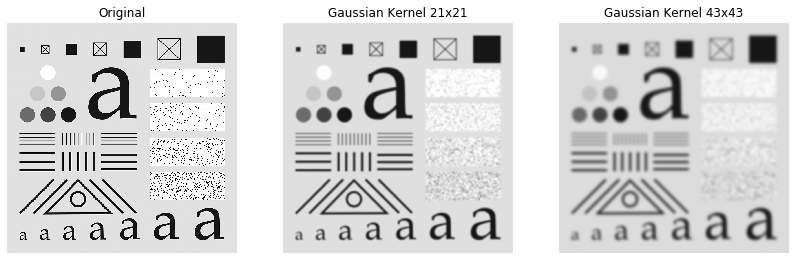

In [8]:
gauss_ptn21 = cv2.GaussianBlur(ptn_img, (21, 21), 0)
gauss_ptn43 = cv2.GaussianBlur(ptn_img, (43, 43), 0)
show_grayimages([ptn_img, gauss_ptn21, gauss_ptn43], 
                ['Original', 'Gaussian Kernel 21x21', 'Gaussian Kernel 43x43'], 
                1, 3, (14, 14))

#### Impact of sigma to Kernel size

Kernel size increase without changes of sigma does not make any impact to the final blurring result. 

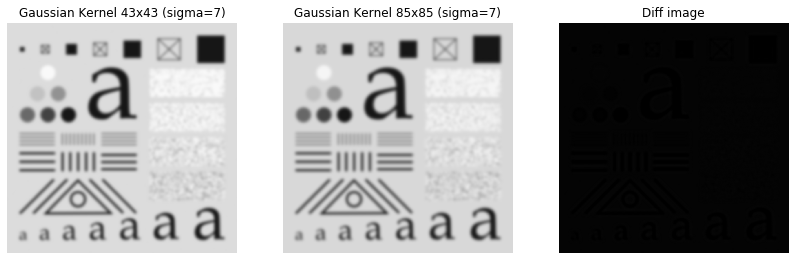

In [9]:
gauss_ptn85 = cv2.GaussianBlur(ptn_img, (85, 85), 7, 7)
gauss_diff_img = cv2.subtract(gauss_ptn43, gauss_ptn85)
show_grayimages([gauss_ptn43, gauss_ptn85, gauss_diff_img], 
                ['Gaussian Kernel 43x43 (sigma=7)', 'Gaussian Kernel 85x85 (sigma=7)', 'Diff image'], 
                1, 3, (14, 14))

(2566, 2758, 3)

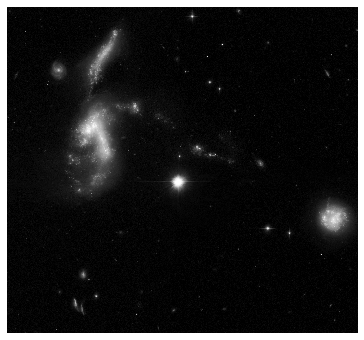

In [10]:
hickson_img = cv2.imread('D:/Data/DIP4E/hickson-compact-group.tif')
showimage(hickson_img)
hickson_img.shape

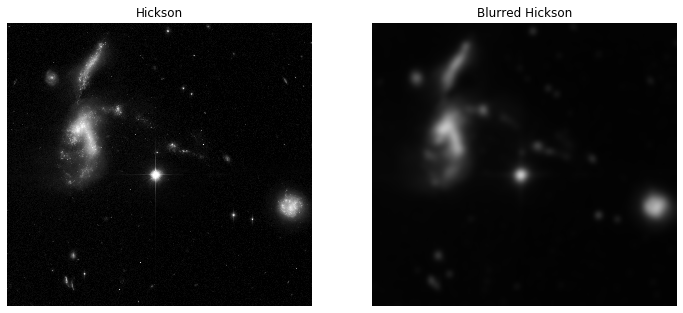

In [11]:
ghick_img = cv2.GaussianBlur(hickson_img, (151, 151), 0)
show_grayimages([hickson_img, ghick_img], ['Hickson', 'Blurred Hickson'], 1, 2, (12,10))

(1024, 1024, 3)

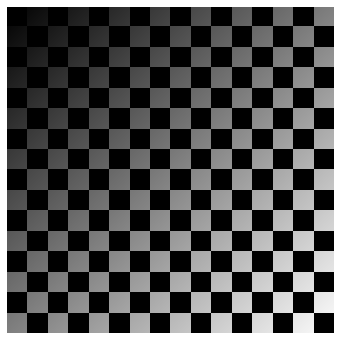

In [12]:
cb_shaded = cv2.imread('D:/Data/DIP4E/checkerboard1024-shaded.tif')
showimage(cb_shaded)
cb_shaded.shape

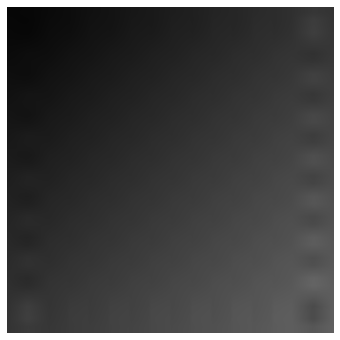

In [13]:
estimated_shaded = cv2.GaussianBlur(cb_shaded, (769, 513), 0)
showimage(estimated_shaded)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


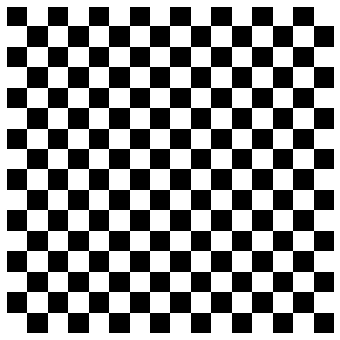

In [14]:
cleancb = cb_shaded / estimated_shaded
cv2.normalize(cleancb, cleancb, 0, 255, cv2.NORM_MINMAX)
showimage(cleancb)

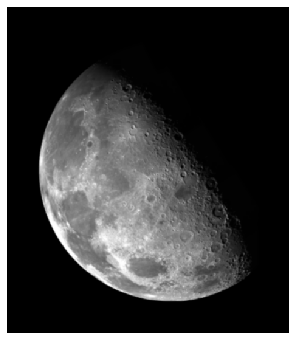

In [15]:
moon = cv2.imread('D:/Data/DIP4E/moon-blurred.tif')
showimage(moon)

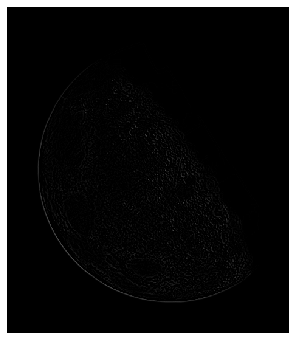

In [16]:
lmoon = cv2.Laplacian(moon, cv2.CV_16U)
showimage(lmoon)

### Highboost Filtering

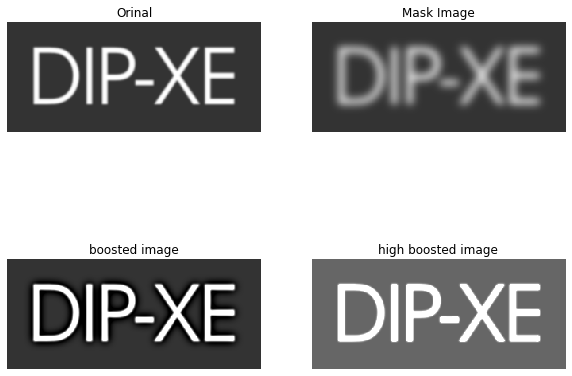

In [45]:
dipxe = cv2.imread('D:/Data/DIP4E/dipxe-text.tif')
gdipxe = cv2.GaussianBlur(dipxe, (31, 31), 0)
bdipxe = cv2.addWeighted(dipxe, 2, gdipxe, -1, 0)
hbdipxe = cv2.addWeighted(dipxe, 2, mdipxe, 3.5, 0)
show_grayimages([dipxe, gdipxe, bdipxe, hbdipxe], 
                ['Orinal', 'Mask Image', 'boosted image', 'high boosted image'], 2, 2, (10, 8))